# UrbanSound8k data sets Data Exploration
In this notebook, we will first pick a sample audio from each noise class in the UrbanSound8k dataset and visualise the soundwave, then explore the UrbanSound8k data sets.

UrbanSound8k can be downloaded in this website:
https://urbansounddataset.weebly.com/urbansound8k.html

It consists of 10 classes:
- Air Conditioner
- Car Horn
- Children Playing
- Dog Bark
- Drilling
- Engine Idling
- Gun Shot
- Jackhammer
- Siren
- Street Music

In [3]:
# import library
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
import struct
import seaborn as sns

In [4]:
# path that python is going to look into.
sys.path

['C:\\Users\\yeevien.ng\\Documents\\Learning\\Python\\Urban sound recognition\\yv_testing',
 'C:\\Users\\yeevien.ng\\Documents\\Learning\\Python\\Python_Custom_Functions',
 'C:\\Users\\yeevien.ng\\Documents\\Learning\\Python\\Urban sound recognition\\yv_testing',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\yeevien.ng\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\yeevien.ng\\.ipython']

In [5]:
# to use this custom function: WavFileHelper
# step 1: go to environmental variable, create PYTHONPATH
# step 2: input the python custom folder, eg: C:\Users\yeevien.ng\Documents\Learning\Python\Python_Custom_Functions
# step 3: make sure the custom script has empty __init__.py

from helpers.wavfilehelper import WavFileHelper

## Inputs 

In [6]:
# SAMPLE DATA
# audio file path
SAMPLE_AUDIO_FP = 'audio_sample/'

# sample audio spreadsheet name
SAMPLE_AUDIO_FN = 'list_of_sample_audio.xlsx'

# FULL DATA
AUDIO_FP = '../UrbanSound8K/audio/'
DATA_FFP = '../UrbanSound8K/metadata/UrbanSound8K.csv'

## [Sample Audio] Visualise urban noise

In [7]:
# filename of all urban noise
# Air conditioner
fn_aircond = 'air_conditioner.wav'

# car horn
fn_carhorn = 'car_horn.wav'

# children playing
fn_childplay = 'children_playing.wav'

# Dog bark
fn_dogbark = 'dog_bark.wav'

# Drilling
fn_drilling = 'drilling.wav'

# engine idling
fn_engineIdle  = 'engine_idling.wav'

# gunshot
fn_gunshot = 'gun_shot.wav'

# jackhammer
fn_jackhammer = 'jackhammer.wav'

# siren
fn_siren = 'siren.wav'

# street music
fn_stmusic = 'street_music.wav'

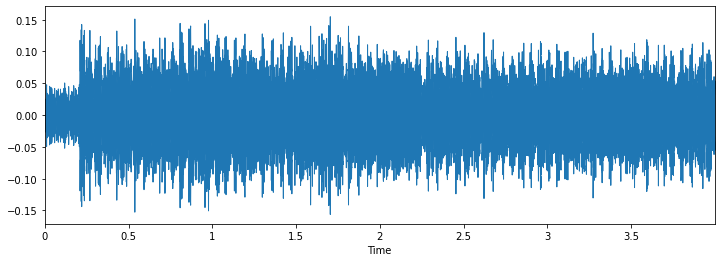

In [8]:
# visualise noise category 
filename = fn_jackhammer
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(SAMPLE_AUDIO_FP + filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(SAMPLE_AUDIO_FP + filename)

### Load sample audio metadata 

In [9]:
# load sample noise metadata
list_audio = pd.read_excel(SAMPLE_AUDIO_FP + SAMPLE_AUDIO_FN)
list_audio

,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,air_conditioner.wav,100852,0.000000,4.000000,1,5,0,air_conditioner
1,car_horn.wav,100648,4.823402,5.471927,2,10,1,car_horn
2,children_playing.wav,100263,58.500000,62.500000,1,5,2,children_playing
3,dog_bark.wav,100032,0.000000,0.317551,1,5,3,dog_bark
4,drilling.wav,103199,0.000000,4.000000,1,3,4,drilling
5,engine_idling.wav,102857,0.000000,4.000000,1,10,5,engine_idling
6,gun_shot.wav,102305,0.000000,2.611610,1,1,6,gun_shot
7,jackhammer.wav,103074,3.341279,7.341279,1,1,7,jackhammer
8,siren.wav,102853,0.000000,4.000000,2,7,8,siren
9,street_music.wav,101848,0.000000,4.000000,1,7,9,street_music


In [10]:
# total sample audio
tot_audio = len(list_audio)
tot_audio

10

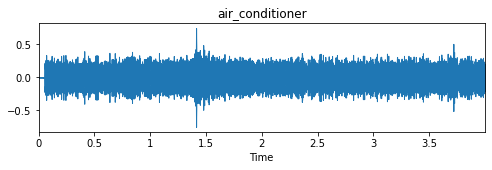

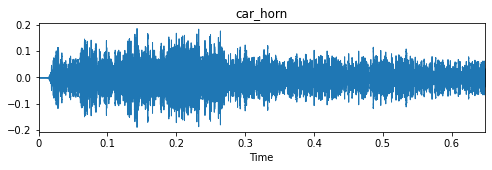

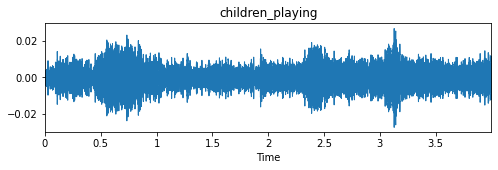

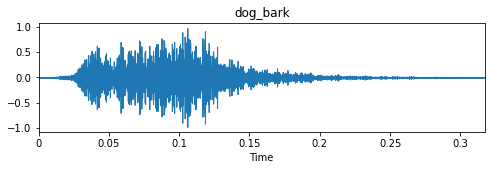

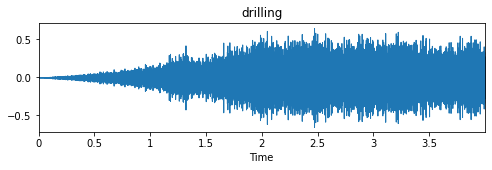

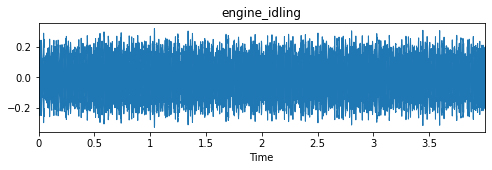

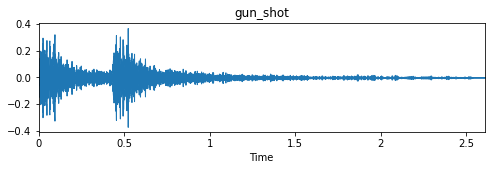

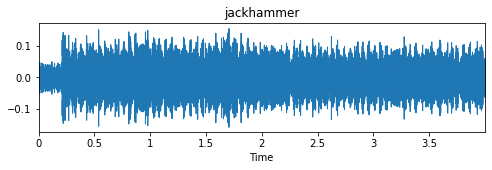

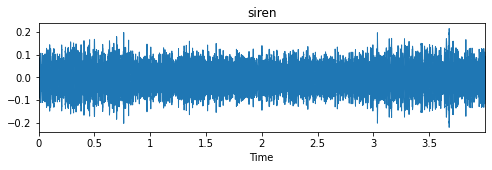

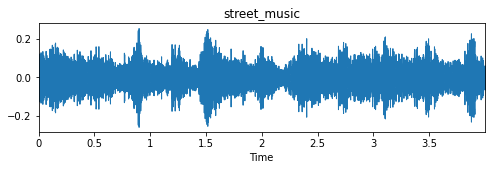

In [11]:
# plot all sample audio
for i, row in list_audio.iterrows():
    classname = row['class_name']
    audiofile = row['slice_file_name']
    
    plt.figure(figsize=(8,2))
    data,sample_rate = librosa.load(SAMPLE_AUDIO_FP + audiofile)
    _ = librosa.display.waveplot(data,sr=sample_rate)
    
    plt.title(classname)
    

Observations:
- Some of the category has similar wavelength
- The waveforms for reptitive sounds for air conditioner, drilling, engine idling and jackhammer are similar in shape. 
- Dog barking has similar wavelength shape as gun shot
- Children playing and street music has similar shape

## [UrbanSound8k] Data Exploration

### Audio Files 
--------------------

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes in WAV format. The classes are drawn from the urban sound taxonmy. The sampling rate, bit depth, and number of 
channels are the same as those of the original file uploaded to Freesound (and hence may vary from file to file).


### Meta-data Files
------------------------

This file contains meta-data information about every audio file in the dataset. This includes:

1. slice_file_name: The name of the audio file. 
2. fsID: The Freesound ID of the recording from which this excerpt (slice) is taken
3. start: The start time of the slice in the original Freesound recording
4. end: The end time of slice in the original Freesound recording
5. salience: A (subjective) salience rating of the sound. 1 = foreground, 2 = background.
6. fold: The fold number (1-10) to which this file has been allocated.
7. classID: A numeric identifier of the sound class:
    - 0 = air_conditioner
    - 1 = car_horn
    - 2 = children_playing
    - 3 = dog_bark
    - 4 = drilling
    - 5 = engine_idling
    - 6 = gun_shot
    - 7 = jackhammer
    - 8 = siren
    - 9 = street_music


In [16]:
# load full data
full_data = pd.read_csv(DATA_FFP)
full_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
# descriptive stats
full_data.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [14]:
# null value check
full_data.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [15]:
# count by class
full_data['class'].value_counts()

engine_idling       1000
air_conditioner     1000
children_playing    1000
drilling            1000
jackhammer          1000
street_music        1000
dog_bark            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

[Observations]
- There are no null values in the data
- "fold" number in the data represents the fold number in the audio folder
- car horn and gun shot has less sample data, this could be an issue when we train/test the data
- the rest have around 1000 sample data.

### Read audio properties
extract number of audio channels, sample rate and bit-depth from each audio file

In [17]:
wavfilehelper = WavFileHelper()

# create new audio data
audio_data = []

for i, row in full_data.iterrows():
    # audio full file name
    audio_ffn = os.path.join(os.path.abspath(AUDIO_FP),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    # read wav file
    data = wavfilehelper.read_file_properties(audio_ffn)
    
    # append into new audio data
    audio_data.append(data)
    
# convert into dataframe
df_audio = pd.DataFrame(audio_data, columns=['channel#', 'sample_rate', 'bit_depth'])

In [18]:
df_audio.head()

,channel#,sample_rate,bit_depth
0,2,44100,16
1,2,44100,16
2,2,44100,16
3,2,44100,16
4,2,44100,16


### Number of channels
Count samples with 2 or more audio channels (stereo) vs Samples with 1 audio channel (mono)

In [19]:
df_audio['channel#'].value_counts()

2    7993
1     739
Name: channel#, dtype: int64

[Observations]
- Most of the audio samples have 2 audio channels (stereo) while the minority have 1 audio channel (mono)
- Merging 2 audio channels into 1 may required for consistency

### Sample rate
Samplerate is the number of samples of audio carried per second, measured in hertz or kilohertz (Hz/kHz)
- 44100 Hz is the sampling rate of audio CDs
- 48000 Hz is the sample rate used for DVDs
- Lower sampling rates have lower audio quality.
- A lower sampling rate can be used to remove the highest frequency hiss present in a noisy signal. Easiest way is to average the values of the 2 channels.

,sample_rate,counts
0,8000,12
1,11024,7
2,11025,39
3,16000,45
4,22050,44
5,24000,82
6,32000,4
7,44100,5370
8,48000,2502
9,96000,610


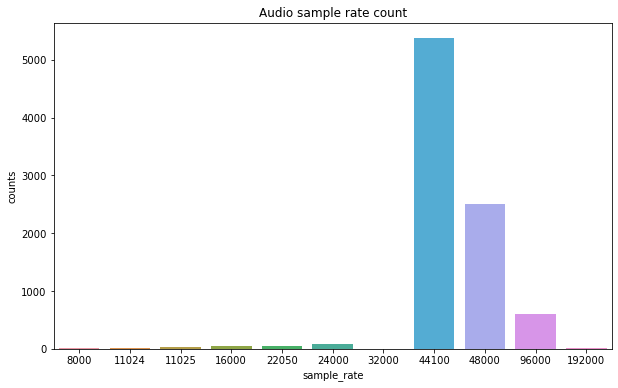

In [20]:
# sample rate count
sample_rate_cnt = df_audio.groupby('sample_rate').size().reset_index(name='counts')

# plot
plt.figure(figsize=(10,6))
ax =sns.barplot(data=sample_rate_cnt, x='sample_rate', y='counts')
ax.set_title('Audio sample rate count')
sample_rate_cnt

[Observations] 
- Various sample rates have been used across all samples, ranging from 8000 hz to 192000 hz
- Most audio data are using 44100 hz sample rate (which is the standard rate)
- Converting the sample rate into the standard rate may required for fair comparison and consistency

### Bit depth 
Bit depth determines the number of possible amplitude values we can record.
- The most common bit depths are 16, 24, 32 bit.
- Each in binary term representing a number of possible values, higher bit depth are able to express more possible values.
- Thus, higher bit depth = higher resolution = more amplitude values are available to record = continuous analog waves = closer to the original fluid analog wave



,bit_depth,counts
0,4,9
1,8,43
2,16,5758
3,24,2753
4,32,169


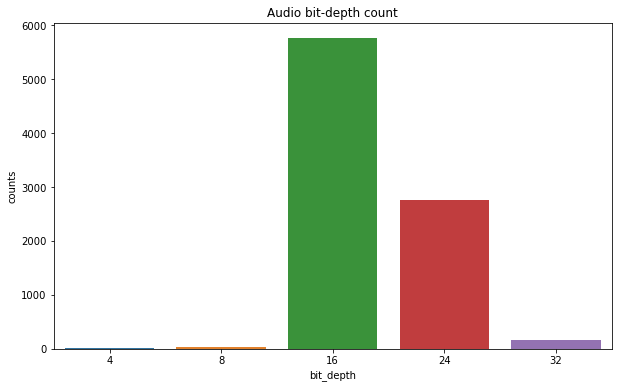

In [21]:
# bit depth count
bit_depth_cnt = df_audio.groupby('bit_depth').size().reset_index(name='counts')

# plot
plt.figure(figsize=(10,6))
ax =sns.barplot(data=bit_depth_cnt, x='bit_depth', y='counts')
ax.set_title('Audio bit-depth count')
bit_depth_cnt

[Observations] 
- Similar to sample rates, there's also various range of bit depths used across all samples.
- May need to normalise them